### Bank Note Authentication

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

In [1]:
##Dataset Link: https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data

# Install project dependencies

import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.simplefilter("ignore")


In [2]:
# Create a dataframe from the csv file
df=pd.read_csv('BankNote_Authentication.csv')
df.shape

(1372, 5)

In [3]:
# Create list of Dataframe columns 
cols = df.columns
cols = cols.tolist()

In [4]:
# Checking number of unique values in the dependent and independent variables of the dataframe
df.nunique()

variance    1338
skewness    1256
curtosis    1270
entropy     1156
class          2
dtype: int64

In [5]:
df.shape

(1372, 5)

In [8]:
# Checking for balance in our target since it'll greatly impact out model result
# From the result below, we can deduce that our target is quite balanced given that out of 1372 observations, 610 is positive and 762 is negative
data = df['class'].value_counts()
data

0    762
1    610
Name: class, dtype: int64

<AxesSubplot:>

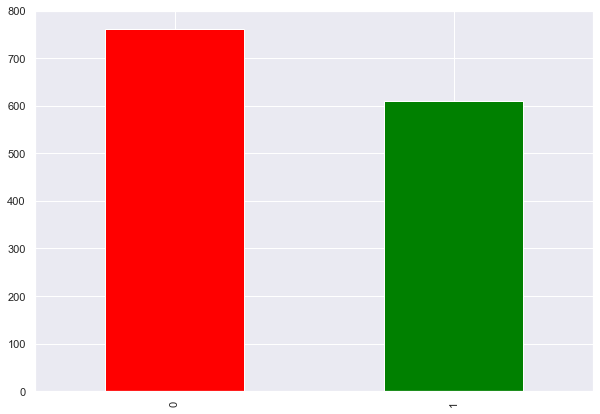

In [15]:
# Plotting different categories of the target value in a graph
data.plot(kind="bar", figsize=(10,7), color=['red', 'green'])

In [16]:
yes = df[df['class'] == 1]
yes.shape


(610, 5)

In [17]:
no = df[df['class'] != 1]
no.shape

(762, 5)

In [21]:
# Checking for duplicate value in the dataframe
dups = df.duplicated()
# report if there are any duplicates print(dups.any())
# list all duplicate rows print(df[dups])
dups.any()
df[dups].shape
# Result below shows 24 rows with duplicate values. This will affect the quality of our modl if we leave them. 

(24, 5)

In [22]:
# Create dataframe of duplicate values
df[dups]

,variance,skewness,curtosis,entropy,class
47,-0.7869,9.5663,-3.7867,-7.5034,0
139,-0.2062,9.2207,-3.7044,-6.8103,0
190,0.9297,-3.7971,4.6429,-0.2957,0
195,-1.8584,7.8860,-1.6643,-1.8384,0
226,0.5706,-0.0248,1.2421,-0.5621,0
268,0.9297,-3.7971,4.6429,-0.2957,0
284,-1.3000,10.2678,-2.9530,-5.8638,0
300,0.3292,-4.4552,4.5718,-0.9888,0
315,0.3292,-4.4552,4.5718,-0.9888,0
320,0.5195,-3.2633,3.0895,-0.9849,0


In [23]:
# Let confirm the shape of our dataframe before dropping the duplicate values
df.shape

(1372, 5)

In [25]:
# delete duplicate rows df.drop_duplicates(inplace=True) print(df.shape) again 
df.drop_duplicates(inplace=True)
df.shape
# If you compare (1372, 5) that we got earlier to the result below, you'll notice we have dropped the duplicate values'

(1348, 5)

In [26]:
# Verify that no duplicates exists

df[dups]

,variance,skewness,curtosis,entropy,class


In [29]:
# Checking for balance in our target since it'll greatly impact out model result
# From the result below, we can deduce that our target is quite balanced given that out of 1348 observations, 610 is positive and 738 is negative
data = df['class'].value_counts()
data

0    738
1    610
Name: class, dtype: int64

<AxesSubplot:>

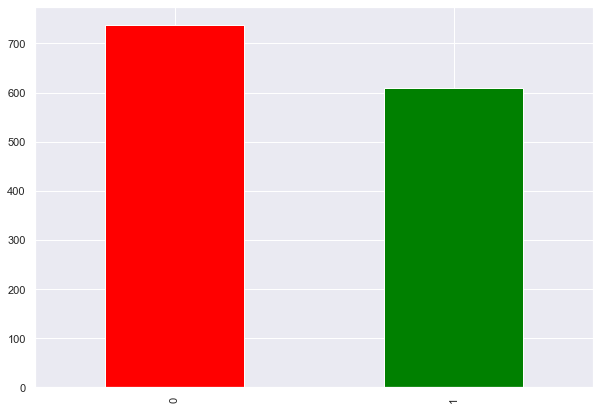

In [30]:
# Plotting different categories of the target value in a graph
data.plot(kind="bar", figsize=(10,7), color=['red', 'green'])

In [34]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712,0.452522
std,2.862906,5.868600,4.328365,2.085877,0.497925
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.786650,-1.627000,-1.545600,-2.393100,0.000000
50%,0.518735,2.334150,0.605495,-0.578890,0.000000
75%,2.853250,6.796025,3.199800,0.403863,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [40]:
# This function is used to find the pairwise correlation of all columns in the dataframe. 
# Any missing values are automatically excluded. For any non-numeric data type columns in the dataframe,
#  it is ignored. This function comes in handy while we doing the Feature Selection by observing the correlation 
# between features and target variable or between variables

df.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.272863,-0.387171,0.273993,-0.735185
skewness,0.272863,1.000000,-0.785376,-0.520293,-0.449835
curtosis,-0.387171,-0.785376,1.000000,0.311379,0.154376
entropy,0.273993,-0.520293,0.311379,1.000000,-0.033979
class,-0.735185,-0.449835,0.154376,-0.033979,1.000000


In [41]:
#  This function shows the data type of each column.
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [36]:
# Checkingfor null/missing values in every column
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [39]:
df.isna().any()

variance    False
skewness    False
curtosis    False
entropy     False
class       False
dtype: bool

In [31]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<AxesSubplot:xlabel='variance', ylabel='Density'>

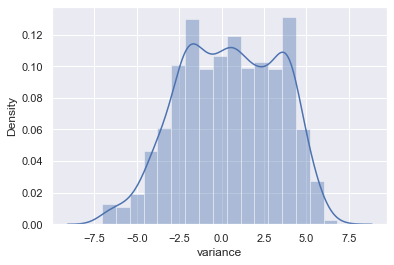

In [32]:
sns.distplot(df['variance'])

In [7]:
df.corr().transpose()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


<AxesSubplot:>

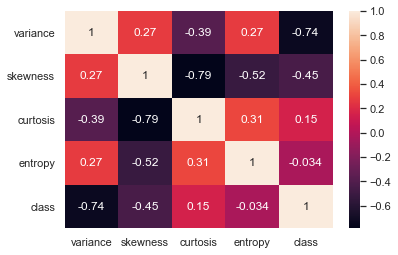

In [33]:
data_corr = df.corr().transpose()

sns.heatmap(data_corr, annot=True)

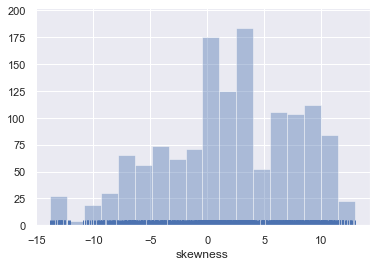

In [10]:
sns.distplot(df['skewness'], kde=False, rug=True);

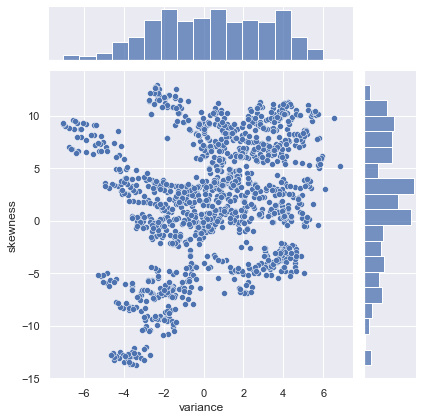

In [11]:
# sns.jointplot(df['variance'], df['skewness'])
sns.jointplot (x = "variance", y = "skewness",
  kind = "scatter", data = df)

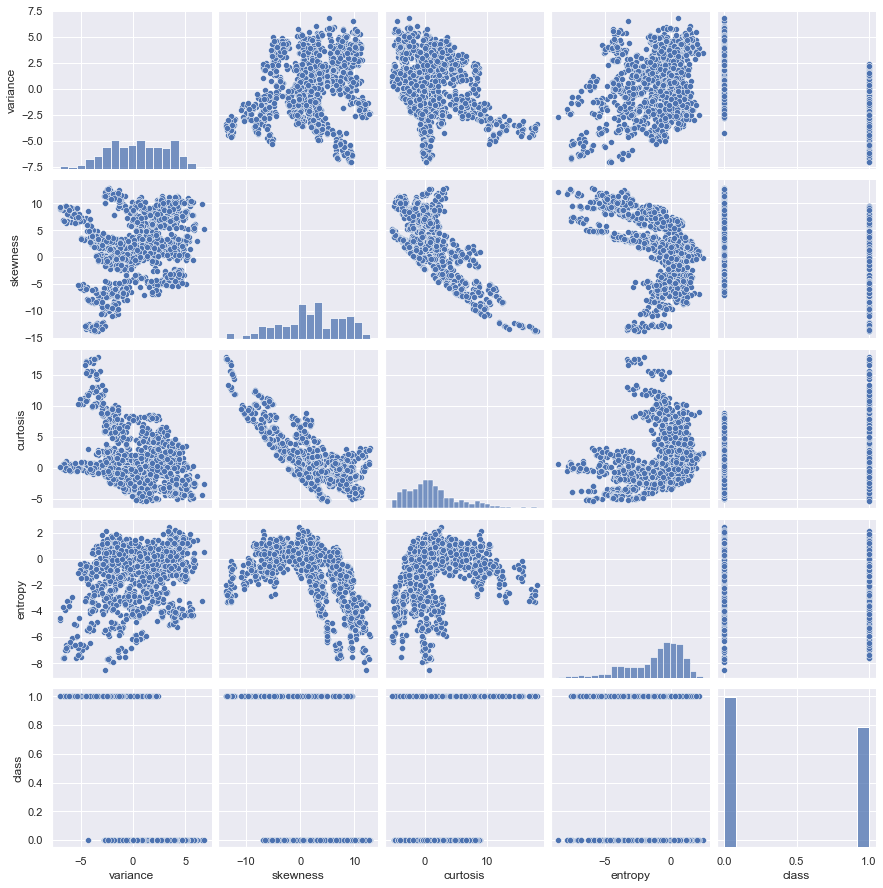

In [12]:
sns.pairplot(df[df.columns])

In [11]:
### Independent and Dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [13]:
tk = [1,2,3,4,5]
tk[:3]
# slicing of array

[1, 2, 3]

In [18]:
X

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [19]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [20]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [15]:
y.head(20)
y.unique()

1

In [18]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
X_train.values

array([[-1.2943  ,  2.6735  , -0.84085 , -2.0323  ],
       [-0.40857 ,  3.0977  , -2.9607  , -2.6892  ],
       [-1.5228  , -6.4789  ,  5.7568  ,  0.87325 ],
       ...,
       [ 0.6005  ,  0.99945 , -2.2126  ,  0.097399],
       [ 2.0165  , -0.25246 ,  5.1707  ,  1.0763  ],
       [-2.0759  , 10.8223  ,  2.6439  , -4.837   ]])

In [21]:
X_test.head(10)

,variance,skewness,curtosis,entropy
1023,-1.7713,-10.766500,10.218400,-1.00430
642,5.1321,-0.031048,0.326160,1.11510
1196,-2.0149,3.687400,-1.938500,-3.89180
31,1.4884,3.627400,3.308000,0.48921
253,5.2868,3.257000,-1.372100,1.16680
535,1.9476,-4.773800,8.527000,-1.86680
184,-1.7559,11.945900,3.094600,-4.89780
758,3.9310,1.854100,-0.023425,1.23140
1308,-4.6338,-12.750900,16.716600,-3.21680
914,-2.5346,-0.773920,3.360200,0.00171


In [23]:
X_test.shape

(275, 4)

In [40]:
y_train.shape

(1097,)

In [41]:
y_test.shape

(275,)

In [24]:
### Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier()
classifier.fit(X_train.values,y_train.values)

RandomForestClassifier()

In [25]:
## Prediction
y_pred=classifier.predict(X_test.values)

In [26]:
### Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [27]:
score

0.9854545454545455

In [54]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [55]:
import numpy as np

In [56]:
classifier.predict([[2,3,4,1]])

array([0])